Project Title: Benford's Law Analysis of Crude Oil Dataset


Angelo Nelson : angelo.nelson@adypu.edu.in
Rohit Nair P  : Rohit.Nair@adypu.edu.in
Deepesh Dey   : Deepesh.Dey@adypu.edu.in
Sanket Jha    : Sanket.Jha@adypu.edu.in

In [3]:
from google.colab import files
uploaded = files.upload()


Saving CRUDE_OIL_DATASET (1).csv to CRUDE_OIL_DATASET (1).csv


In [4]:
import pandas as pd

df = pd.read_csv("CRUDE_OIL_DATASET (1).csv")
df.head()


,Month,Year,PRODUCTS,TRADE,Quantity (000 Metric Tonnes),Value in Rupees (Crore),Value in Dollars (Million US dollar),date_updated
0,April,2024,CRUDE OIL,Import,21439.18,108423.34,12992.66,2025-04-26 04:00:34
1,April,2024,LPG,Import,1570.75,8005.70,959.87,2025-04-26 04:00:34
2,April,2024,MS,Import,29.99,224.85,26.97,2025-04-26 04:00:34
3,April,2024,Naphtha,Import,121.22,735.58,88.19,2025-04-26 04:00:34
4,April,2024,ATF,Import,0.00,0.02,0.00,2025-04-26 04:00:34


In [24]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import pandas as pd

print("Libraries imported.")




Libraries imported.


In [25]:

if df is not None:
    duplicates_count = df.duplicated().sum()
    print(f"\nNumber of duplicate rows found: {duplicates_count}")

    if duplicates_count > 0:
        df.drop_duplicates(inplace=True)
        print("Duplicate rows removed.")
        print("DataFrame shape after removing duplicates:", df.shape)
    else:
        print("No duplicate rows to remove.")


Number of duplicate rows found: 0
No duplicate rows to remove.


In [26]:

if df is not None:
    print("\nMissing values per column:")
    print(df.isnull().sum())



Missing values per column:
Month                                    0
Year                                     0
PRODUCTS                                 0
TRADE                                    0
Quantity (000 Metric Tonnes)            43
Value in Rupees (Crore)                 43
Value in Dollars (Million US dollar)    43
date_updated                             0
dtype: int64


In [27]:

def get_first_digit(number):

    try:
        num_float = float(number)
    except (ValueError, TypeError):
        return None

    if num_float == 0 or pd.isna(num_float):
        return None


    abs_num_str = str(abs(num_float))

    cleaned_num_str = abs_num_str.lstrip('0.')
    if cleaned_num_str.endswith('.0'):
        cleaned_num_str = cleaned_num_str[:-2]


    if not cleaned_num_str:
        return None
    return int(cleaned_num_str[0])



In [28]:

if df is not None:

    column_to_analyze = 'Value in Rupees (Crore)'

    if column_to_analyze not in df.columns:
          raise ValueError(f"Column '{column_to_analyze}' not found in DataFrame.")

    print(f"\n--- Starting Benford's Law Analysis for: {column_to_analyze} ---")


    df_analysis = df.copy()
    df_analysis[column_to_analyze] = pd.to_numeric(df_analysis[column_to_analyze], errors='coerce')


    first_digits = df_analysis[column_to_analyze].apply(get_first_digit).dropna().astype(int)


    if len(first_digits) < 50:
        print(f"Warning: Only {len(first_digits)} valid (non-zero, non-NaN) data points found for '{column_to_analyze}'. Benford's Law analysis is more reliable with larger datasets.")

    if len(first_digits) == 0:
        print(f"Error: No valid numeric data found for '{column_to_analyze}'. Cannot perform Benford's analysis.")

        can_proceed = False
    else:
        can_proceed = True
        print(f"\nSuccessfully extracted first digits from {len(first_digits)} valid data points.")

else:
    can_proceed = False


--- Starting Benford's Law Analysis for: Value in Rupees (Crore) ---

Successfully extracted first digits from 489 valid data points.


In [30]:

if can_proceed:
    digit_counts = first_digits.value_counts().sort_index()
    observed_freq = digit_counts / len(first_digits)
    observed_freq = observed_freq.reindex(range(1, 10), fill_value=0)
    observed_counts = digit_counts.reindex(range(1, 10), fill_value=0)

    print("Observed frequencies calculated.")

Observed frequencies calculated.


In [31]:

if can_proceed:
    digits = np.arange(1, 10)
    benford_freq = np.log10(1 + 1/digits)
    benford_expected_counts = benford_freq * len(first_digits)

    print("Benford expected frequencies calculated.")

Benford expected frequencies calculated.


In [32]:

if can_proceed:
    print(f"\nTotal valid data points analyzed: {len(first_digits)}\n")
    print("Digit | Observed Freq | Benford Freq")
    print("-------------------------------------")
    for i in range(1, 10):
        print(f"  {i}   |     {observed_freq.loc[i]:.4f}      |     {benford_freq[i-1]:.4f}")


Total valid data points analyzed: 489

Digit | Observed Freq | Benford Freq
-------------------------------------
  1   |     0.3395      |     0.3010
  2   |     0.1616      |     0.1761
  3   |     0.0941      |     0.1249
  4   |     0.0573      |     0.0969
  5   |     0.0491      |     0.0792
  6   |     0.0511      |     0.0669
  7   |     0.0838      |     0.0580
  8   |     0.0859      |     0.0512
  9   |     0.0777      |     0.0458



--- Starting Benford's Law Analysis for: Value in Rupees (Crore) ---

Successfully extracted first digits from 489 valid data points.
Observed frequencies calculated.
Benford expected frequencies calculated.

Total valid data points analyzed: 489

Digit | Observed Freq | Benford Freq
-------------------------------------
  1   |     0.3395      |     0.3010
  2   |     0.1616      |     0.1761
  3   |     0.0941      |     0.1249
  4   |     0.0573      |     0.0969
  5   |     0.0491      |     0.0792
  6   |     0.0511      |     0.0669
  7   |     0.0838      |     0.0580
  8   |     0.0859      |     0.0512
  9   |     0.0777      |     0.0458


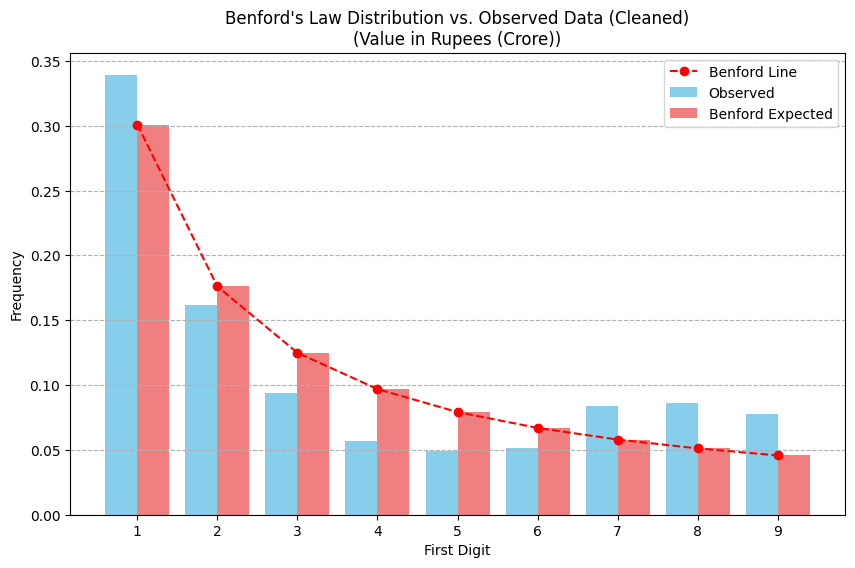

Plot generated.

--- Chi-squared Test ---
Chi-squared Statistic: 50.1553
P-value: 0.0000
Result: Reject the null hypothesis (p < 0.05).
The observed distribution significantly deviates from Benford's Law.


In [42]:
column_to_analyze = 'Value in Rupees (Crore)'

if df is not None:
    if column_to_analyze not in df.columns:
        print(f"Error: Column '{column_to_analyze}' not found in DataFrame.")
        can_proceed = False
    else:
        print(f"\n--- Starting Benford's Law Analysis for: {column_to_analyze} ---")

        df_analysis = df.copy()
        df_analysis[column_to_analyze] = pd.to_numeric(df_analysis[column_to_analyze], errors='coerce')

        first_digits = df_analysis[column_to_analyze].apply(get_first_digit).dropna().astype(int)

        if len(first_digits) < 50:
            print(f"Warning: Only {len(first_digits)} valid (non-zero, non-NaN) data points found for '{column_to_analyze}'. Benford's Law analysis is more reliable with larger datasets.")
        if len(first_digits) == 0:
            print(f"Error: No valid numeric data found for '{column_to_analyze}'. Cannot perform Benford's analysis.")
            can_proceed = False
        else:
            can_proceed = True
            print(f"\nSuccessfully extracted first digits from {len(first_digits)} valid data points.")
else:
    print("DataFrame not loaded. Cannot perform analysis.")
    can_proceed = False

if can_proceed:
    digit_counts = first_digits.value_counts().sort_index()
    observed_freq = digit_counts / len(first_digits)
    observed_freq = observed_freq.reindex(range(1, 10), fill_value=0)
    observed_counts = digit_counts.reindex(range(1, 10), fill_value=0)
    print("Observed frequencies calculated.")

if can_proceed:
    digits = np.arange(1, 10)
    benford_freq = np.log10(1 + 1/digits)
    benford_expected_counts = benford_freq * len(first_digits)
    print("Benford expected frequencies calculated.")

if can_proceed:
    print(f"\nTotal valid data points analyzed: {len(first_digits)}\n")
    print("Digit | Observed Freq | Benford Freq")
    print("-------------------------------------")
    for i in range(1, 10):
        print(f"  {i}   |     {observed_freq.loc[i]:.4f}      |     {benford_freq[i-1]:.4f}")

if can_proceed:
    plt.figure(figsize=(10, 6))
    plt.bar(digits - 0.2, observed_freq, width=0.4, label='Observed', color='skyblue')
    plt.bar(digits + 0.2, benford_freq, width=0.4, label='Benford Expected', color='lightcoral')
    plt.plot(digits, benford_freq, marker='o', color='red', linestyle='--', label='Benford Line')

    plt.xlabel("First Digit")
    plt.ylabel("Frequency")
    plt.title(f"Benford's Law Distribution vs. Observed Data (Cleaned)\n({column_to_analyze})")
    plt.xticks(digits)
    plt.legend()
    plt.grid(axis='y', linestyle='--')
    plt.show()
    print("Plot generated.")

if can_proceed:
    if np.any(benford_expected_counts < 1):
       print("\nWarning: Chi-squared test may be unreliable because one or more expected frequencies are less than 1.")
       print("Consider increasing the number of data points or using a different statistical test.")
       run_chi_squared = False

    else:
        run_chi_squared = True

    if run_chi_squared:
        chi_square_stat, p_value = chisquare(f_obs=observed_counts, f_exp=benford_expected_counts)

        print("\n--- Chi-squared Test ---")
        print(f"Chi-squared Statistic: {chi_square_stat:.4f}")
        print(f"P-value: {p_value:.4f}")

        alpha = 0.05
        if p_value < alpha:
            print(f"Result: Reject the null hypothesis (p < {alpha}).")
            print("The observed distribution significantly deviates from Benford's Law.")
        else:
            print(f"Result: Fail to reject the null hypothesis (p >= {alpha}).")
            print("The observed distribution is consistent with Benford's Law.")
    else:
        print("\nChi-squared test skipped due to insufficient expected counts.")





Successfully extracted first digits from 486 valid data points.
Observed frequencies calculated.
Benford expected frequencies calculated.

Total valid data points analyzed: 486

Digit | Observed Freq | Benford Freq
-------------------------------------
  1   |     0.4074      |     0.3010
  2   |     0.1481      |     0.1761
  3   |     0.1255      |     0.1249
  4   |     0.0617      |     0.0969
  5   |     0.0514      |     0.0792
  6   |     0.0329      |     0.0669
  7   |     0.0391      |     0.0580
  8   |     0.0556      |     0.0512
  9   |     0.0782      |     0.0458


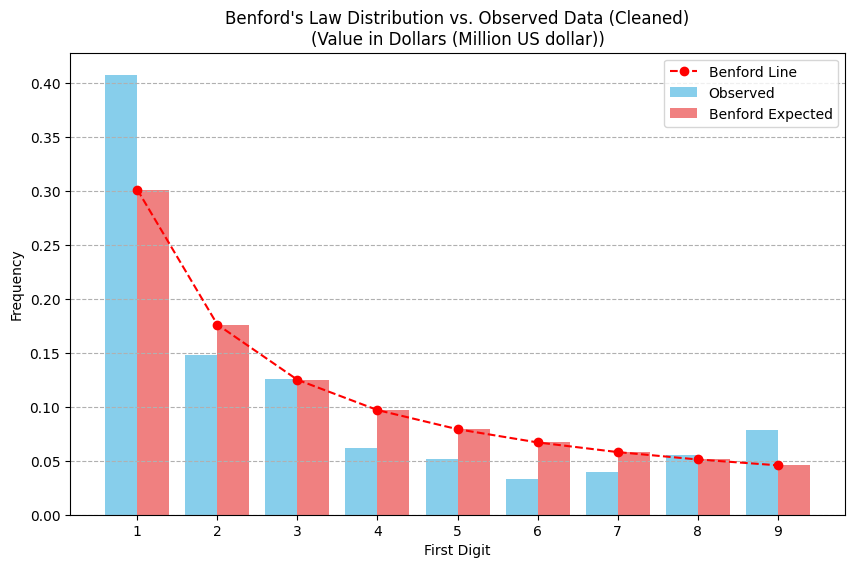

Plot generated.

--- Chi-squared Test ---
Chi-squared Statistic: 54.1093
P-value: 0.0000
Result: Reject the null hypothesis (p < 0.05).
The observed distribution significantly deviates from Benford's Law.


In [37]:
column_to_analyze = 'Value in Dollars (Million US dollar)'

if df is not None:
    if column_to_analyze not in df.columns:
          raise ValueError(f"Column '{column_to_analyze}' not found in DataFrame.")



    df_analysis = df.copy()
    df_analysis[column_to_analyze] = pd.to_numeric(df_analysis[column_to_analyze], errors='coerce')
    first_digits = df_analysis[column_to_analyze].apply(get_first_digit).dropna().astype(int)

    if len(first_digits) < 50:
        print(f"Warning: Only {len(first_digits)} valid data points found. Analysis may be unreliable.")
    if len(first_digits) == 0:
        print(f"Error: No valid numeric data found for '{column_to_analyze}'. Cannot perform Benford's analysis.")
        can_proceed = False
    else:
        can_proceed = True
        print(f"\nSuccessfully extracted first digits from {len(first_digits)} valid data points.")
else:
    can_proceed = False

if can_proceed:
    digit_counts = first_digits.value_counts().sort_index()
    observed_freq = digit_counts / len(first_digits)
    observed_freq = observed_freq.reindex(range(1, 10), fill_value=0)
    observed_counts = digit_counts.reindex(range(1, 10), fill_value=0)
    print("Observed frequencies calculated.")
if can_proceed:
    digits = np.arange(1, 10)
    benford_freq = np.log10(1 + 1/digits)
    benford_expected_counts = benford_freq * len(first_digits)
    print("Benford expected frequencies calculated.")
if can_proceed:
    print(f"\nTotal valid data points analyzed: {len(first_digits)}\n")
    print("Digit | Observed Freq | Benford Freq")
    print("-------------------------------------")
    for i in range(1, 10):
        print(f"  {i}   |     {observed_freq.loc[i]:.4f}      |     {benford_freq[i-1]:.4f}")
if can_proceed:
    plt.figure(figsize=(10, 6))
    plt.bar(digits - 0.2, observed_freq, width=0.4, label='Observed', color='skyblue')
    plt.bar(digits + 0.2, benford_freq, width=0.4, label='Benford Expected', color='lightcoral')
    plt.plot(digits, benford_freq, marker='o', color='red', linestyle='--', label='Benford Line')

    plt.xlabel("First Digit")
    plt.ylabel("Frequency")
    plt.title(f"Benford's Law Distribution vs. Observed Data (Cleaned)\n({column_to_analyze})")
    plt.xticks(digits)
    plt.legend()
    plt.grid(axis='y', linestyle='--')
    plt.show()
    print("Plot generated.")

if can_proceed:
    if np.any(benford_expected_counts < 1):
       print("\nWarning: Chi-squared test may be unreliable (expected < 1).")
       run_chi_squared = False

    else:
        run_chi_squared = True

    if run_chi_squared:
        chi_square_stat, p_value = chisquare(f_obs=observed_counts, f_exp=benford_expected_counts)
        print("\n--- Chi-squared Test ---")
        print(f"Chi-squared Statistic: {chi_square_stat:.4f}")
        print(f"P-value: {p_value:.4f}")
        alpha = 0.05
        if p_value < alpha:
            print(f"Result: Reject the null hypothesis (p < {alpha}).")
            print("The observed distribution significantly deviates from Benford's Law.")
        else:
            print(f"Result: Fail to reject the null hypothesis (p >= {alpha}).")
            print("The observed distribution is consistent with Benford's Law.")
    else:
        print("\nChi-squared test skipped.")


Successfully extracted first digits from 480 valid data points.
Observed frequencies calculated.
Benford expected frequencies calculated.

Total valid data points analyzed: 480

Digit | Observed Freq | Benford Freq
-------------------------------------
  1   |     0.3479      |     0.3010
  2   |     0.2083      |     0.1761
  3   |     0.0771      |     0.1249
  4   |     0.1229      |     0.0969
  5   |     0.0646      |     0.0792
  6   |     0.0458      |     0.0669
  7   |     0.0646      |     0.0580
  8   |     0.0417      |     0.0512
  9   |     0.0271      |     0.0458


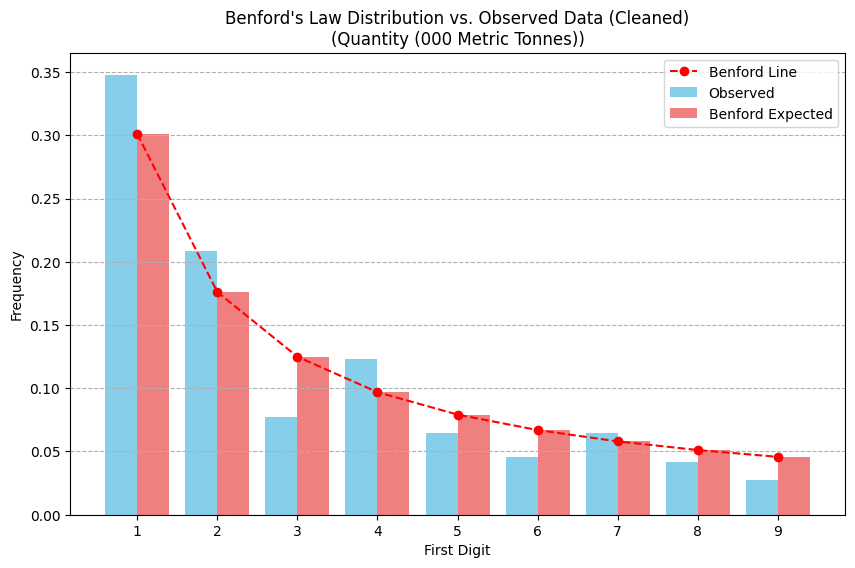

Plot generated.

--- Chi-squared Test ---
Chi-squared Statistic: 27.8375
P-value: 0.0005
Result: Reject the null hypothesis (p < 0.05).
The observed distribution significantly deviates from Benford's Law.


In [38]:
column_to_analyze = 'Quantity (000 Metric Tonnes)'

if df is not None:
    if column_to_analyze not in df.columns:
          raise ValueError(f"Column '{column_to_analyze}' not found in DataFrame.")



    df_analysis = df.copy()
    df_analysis[column_to_analyze] = pd.to_numeric(df_analysis[column_to_analyze], errors='coerce')
    first_digits = df_analysis[column_to_analyze].apply(get_first_digit).dropna().astype(int)

    if len(first_digits) < 50:
        print(f"Warning: Only {len(first_digits)} valid data points found. Analysis may be unreliable.")
    if len(first_digits) == 0:
        print(f"Error: No valid numeric data found for '{column_to_analyze}'. Cannot perform Benford's analysis.")
        can_proceed = False
    else:
        can_proceed = True
        print(f"\nSuccessfully extracted first digits from {len(first_digits)} valid data points.")
else:
    can_proceed = False
if can_proceed:
    digit_counts = first_digits.value_counts().sort_index()
    observed_freq = digit_counts / len(first_digits)
    observed_freq = observed_freq.reindex(range(1, 10), fill_value=0)
    observed_counts = digit_counts.reindex(range(1, 10), fill_value=0)
    print("Observed frequencies calculated.")
if can_proceed:
    digits = np.arange(1, 10)
    benford_freq = np.log10(1 + 1/digits)
    benford_expected_counts = benford_freq * len(first_digits)
    print("Benford expected frequencies calculated.")


if can_proceed:
    print(f"\nTotal valid data points analyzed: {len(first_digits)}\n")
    print("Digit | Observed Freq | Benford Freq")
    print("-------------------------------------")
    for i in range(1, 10):
        print(f"  {i}   |     {observed_freq.loc[i]:.4f}      |     {benford_freq[i-1]:.4f}")

if can_proceed:
    plt.figure(figsize=(10, 6))
    plt.bar(digits - 0.2, observed_freq, width=0.4, label='Observed', color='skyblue')
    plt.bar(digits + 0.2, benford_freq, width=0.4, label='Benford Expected', color='lightcoral')
    plt.plot(digits, benford_freq, marker='o', color='red', linestyle='--', label='Benford Line')

    plt.xlabel("First Digit")
    plt.ylabel("Frequency")
    plt.title(f"Benford's Law Distribution vs. Observed Data (Cleaned)\n({column_to_analyze})")
    plt.xticks(digits)
    plt.legend()
    plt.grid(axis='y', linestyle='--')
    plt.show()
    print("Plot generated.")

if can_proceed:
    if np.any(benford_expected_counts < 1):
       print("\nWarning: Chi-squared test may be unreliable (expected < 1).")
       run_chi_squared = False

    else:
        run_chi_squared = True

    if run_chi_squared:
        chi_square_stat, p_value = chisquare(f_obs=observed_counts, f_exp=benford_expected_counts)
        print("\n--- Chi-squared Test ---")
        print(f"Chi-squared Statistic: {chi_square_stat:.4f}")
        print(f"P-value: {p_value:.4f}")
        alpha = 0.05
        if p_value < alpha:
            print(f"Result: Reject the null hypothesis (p < {alpha}).")
            print("The observed distribution significantly deviates from Benford's Law.")
        else:
            print(f"Result: Fail to reject the null hypothesis (p >= {alpha}).")
            print("The observed distribution is consistent with Benford's Law.")
    else:
        print("\nChi-squared test skipped.")

Sanket Jha   :Responsible for initial data loading and cleaning (handling
              duplicates and missing values). Implemented the get_first_digit function.
Deepesh Dey  :Performed the Benford's Law analysis for the 'Value in Rupees
              (Crore)' and 'Value in Dollars (Million US dollar)' columns, including calculating frequencies, generating plots, and running Chi-squared tests.
Angelo Nelson:Performed the Benford's Law analysis for the 'Quantity (000
              Metric Tonnes)' column, calculated frequencies, generated plots, and interpreted the Chi-squared test results for all columns.
Rohit Nair P :Structured the Google Colab notebook, wrote the introduction and
             conclusion sections, and prepared the presentation outline based on the analysis results.
             
